# Lab 4

## Done by Eris Leksi (9067882)

# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [524]:
import pandas as pd
import numpy as np

### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [525]:
df_pew = pd.read_csv('./Data/pew-raw.csv')

2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [526]:
print(df_pew.loc[0:10, ['religion', '$50-75k']])
print("--------------------*-------------------*-------------------*-------------------*-------------------*-------------------")
print(df_pew.iloc[0:10])
print("--------------------*-------------------*-------------------*-------------------*-------------------*-------------------")
print(df_pew.head(5))
print("--------------------*-------------------*-------------------*-------------------*-------------------*-------------------")
print(df_pew.tail(5))   

                   religion  $50-75k
0                  Agnostic      137
1                   Atheist       70
2                  Buddhist       58
3                  Catholic     1116
4         Dont know/refused       35
5         Evangelical Prot      1486
6                    Hindu        34
7  Historically Black Prot       223
8         Jehovahs Witness        30
9                   Jewish        95
--------------------*-------------------*-------------------*-------------------*-------------------*-------------------
                   religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  \
0                  Agnostic      27        34       60       81        76   
1                   Atheist      12        27       37       52        35   
2                  Buddhist      27        21       30       34        33   
3                  Catholic     418       617      732      670       638   
4         Dont know/refused      15        14       15       11        10   
5         

***What does not seem right in the above dataframe?***

The primary thing that does not seem right about this dataset is that there is an inconsistent column/feature grouping, meaning that the dataset presentation is fragmented, especially with the income bracket columns. The second "not right" thing that we can see is the missing context and the unclear order, meaning that the bracket gaps between the features do not all fall in the same range (some of tham have a 10k range and there is one with a 25k range). We can also observe that the naming should be different. For example: If we choose an income equal to the upper boundary of a income bracket ($20k). Which group is it going to belong to, the $10-20k or the $20-30k? We need to rename the feature income brackets to not deal with intersections between them. We can take different approaches to fix this and down below we will take one of them.

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [527]:
df_pew_tidy = pd.melt(df_pew, id_vars=['religion'], var_name='income', value_name='count')
print(df_pew_tidy.head(10))
print("--------------------*-------------------*-------------------*-------------------*-------------------*-------------------")
print(df_pew_tidy.tail(10))

                   religion  income  count
0                  Agnostic   <$10k     27
1                   Atheist   <$10k     12
2                  Buddhist   <$10k     27
3                  Catholic   <$10k    418
4         Dont know/refused   <$10k     15
5         Evangelical Prot    <$10k    575
6                    Hindu    <$10k      1
7  Historically Black Prot    <$10k    228
8         Jehovahs Witness    <$10k     20
9                   Jewish    <$10k     19
--------------------*-------------------*-------------------*-------------------*-------------------*-------------------
                    religion   income  count
50                  Agnostic  $50-75k    137
51                   Atheist  $50-75k     70
52                  Buddhist  $50-75k     58
53                  Catholic  $50-75k   1116
54         Dont know/refused  $50-75k     35
55         Evangelical Prot   $50-75k   1486
56                    Hindu   $50-75k     34
57  Historically Black Prot   $50-75k    223
5

### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [528]:
df_billboard = pd.read_csv('./Data/billboard.csv', encoding='unicode_escape')

2. Observe the first few rows of the dataset.

In [529]:
print(df_billboard.head(10))

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   
5  2000                Janet                  Doesn't Really Matter  4:17   
6  2000      Destiny's Child                            Say My Name  4:31   
7  2000    Iglesias, Enrique                            Be With You  3:36   
8  2000                Sisqo                             Incomplete  3:52   
9  2000             Lonestar                                 Amazed  4:25   

     genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week  ...  \
0     Rock   2000-09-23  2000-11-18         78       63.0       49.0  ...  

***What is wrong with the above dataset?***

There are plenty of things that are not right about the above dataset.

 One of the things is that the column naming is very inconsistent, meaning column names like x1st.week, x2nd.week are not standard and include a prefix 'x' which is unnecessary and confusing. 

 Secondly, the representation of the dataset is really sparse, meaning a few values are present in many columns and the structure is very inefficient.

 Lastly, from around the x67th.week to x72nd.week (maybe even on earlier weeks, but that is all I can see from the output), all values are NaN and it is taking a lot of memory space for storing those values and it also making harder for the run-time to go through all the dataset.

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [530]:
df_billboard_melted = pd.melt(
    df_billboard,
    id_vars=['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked'],
    var_name='week',
    value_name='rank'
)
print(df_billboard_melted.head(10))

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   
5  2000                Janet                  Doesn't Really Matter  4:17   
6  2000      Destiny's Child                            Say My Name  4:31   
7  2000    Iglesias, Enrique                            Be With You  3:36   
8  2000                Sisqo                             Incomplete  3:52   
9  2000             Lonestar                                 Amazed  4:25   

     genre date.entered date.peaked       week  rank  
0     Rock   2000-09-23  2000-11-18  x1st.week  78.0  
1     Rock   2000-02-12  2000-04-08  x1st.

If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [531]:
df_billboard_melted['week'] = df_billboard_melted['week'].str.extract(r'(\d+)').astype(float)
print(df_billboard_melted.head(10))

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   
5  2000                Janet                  Doesn't Really Matter  4:17   
6  2000      Destiny's Child                            Say My Name  4:31   
7  2000    Iglesias, Enrique                            Be With You  3:36   
8  2000                Sisqo                             Incomplete  3:52   
9  2000             Lonestar                                 Amazed  4:25   

     genre date.entered date.peaked  week  rank  
0     Rock   2000-09-23  2000-11-18   1.0  78.0  
1     Rock   2000-02-12  2000-04-08   1.0  15.0  
2 

Week feature is fixed now and is not inconsistent anymore!

5. Now let's inspect the ***Week*** column in the dataframe.

In [532]:
print(df_billboard_melted['week'].describe())
print(df_billboard_melted['week'].unique())

count    24092.000000
mean        38.500000
std         21.937866
min          1.000000
25%         19.750000
50%         38.500000
75%         57.250000
max         76.000000
Name: week, dtype: float64
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76.]


I showed some insights of the week feature. We can see that it takes values from 1 to 76 with an average of 38.5. 

Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



Equation: 

Ranked Date = Start Date + (Week Number − 1) × 7 days

or in python:

df['ranked_date'] = start_date + pd.to_timedelta((df['week'] - 1) * 7, unit='D')

In [533]:
df_billboard_melted['date.entered'] = pd.to_datetime(df_billboard_melted['date.entered'])

df_billboard_melted['ranked_date'] = df_billboard_melted['date.entered'] + pd.to_timedelta((df_billboard_melted['week'] - 1) * 7, unit='D')

print(df_billboard_melted[['date.entered', 'week', 'ranked_date']].head(10))
print("--------------------*-------------------*-------------------*-------------------*-------------------*-------------------")

  date.entered  week ranked_date
0   2000-09-23   1.0  2000-09-23
1   2000-02-12   1.0  2000-02-12
2   1999-10-23   1.0  1999-10-23
3   2000-08-12   1.0  2000-08-12
4   2000-08-05   1.0  2000-08-05
5   2000-06-17   1.0  2000-06-17
6   1999-12-25   1.0  1999-12-25
7   2000-04-01   1.0  2000-04-01
8   2000-06-24   1.0  2000-06-24
9   1999-06-05   1.0  1999-06-05
--------------------*-------------------*-------------------*-------------------*-------------------*-------------------


*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

It will be off by one. The formula correctly uses (week - 1) to avoid assuming that week 1 happens 7 days after date.entered. If this were omitted, dates would be pushed one week too far.

Data type mismatch: If week is not an integer or contains NaN, the timedelta operation could fail.

Missing or malformed date.entered values: If any dates are not properly parsed to datetime, the addition will throw an error.

So the main risk lies in data quality: missing, malformed, or NaN values in date.entered or week.

7. Let's only keep necessary columns

In [534]:
df_billboard_melted = df_billboard_melted[['track', 'artist.inverted', 'week', 'rank', 'date.entered']]

8. How to rename your columns?

In [535]:
df_billboard_melted.rename(columns={
    'track': 'Song',
    'artist.inverted': 'Performer',
    'week': 'WeekNumber',
    'rank': 'Rank',
    'date.entered': 'StartDate'
}, inplace=True)

print(df_billboard_melted.head(10))


                                    Song            Performer  WeekNumber  \
0               Independent Women Part I      Destiny's Child         1.0   
1                           Maria, Maria              Santana         1.0   
2                     I Knew I Loved You        Savage Garden         1.0   
3                                  Music              Madonna         1.0   
4  Come On Over Baby (All I Want Is You)  Aguilera, Christina         1.0   
5                  Doesn't Really Matter                Janet         1.0   
6                            Say My Name      Destiny's Child         1.0   
7                            Be With You    Iglesias, Enrique         1.0   
8                             Incomplete                Sisqo         1.0   
9                                 Amazed             Lonestar         1.0   

   Rank  StartDate  
0  78.0 2000-09-23  
1  15.0 2000-02-12  
2  71.0 1999-10-23  
3  41.0 2000-08-12  
4  57.0 2000-08-05  
5  59.0 2000-06-17  
6  83

Display the dataframe

In [536]:
print(df_billboard_melted.head(10))
print("--------------------*-------------------*-------------------*-------------------*-------------------*-------------------")
print(df_billboard_melted.tail(10))

                                    Song            Performer  WeekNumber  \
0               Independent Women Part I      Destiny's Child         1.0   
1                           Maria, Maria              Santana         1.0   
2                     I Knew I Loved You        Savage Garden         1.0   
3                                  Music              Madonna         1.0   
4  Come On Over Baby (All I Want Is You)  Aguilera, Christina         1.0   
5                  Doesn't Really Matter                Janet         1.0   
6                            Say My Name      Destiny's Child         1.0   
7                            Be With You    Iglesias, Enrique         1.0   
8                             Incomplete                Sisqo         1.0   
9                                 Amazed             Lonestar         1.0   

   Rank  StartDate  
0  78.0 2000-09-23  
1  15.0 2000-02-12  
2  71.0 1999-10-23  
3  41.0 2000-08-12  
4  57.0 2000-08-05  
5  59.0 2000-06-17  
6  83

In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

We do not need to drop all the rows that contain one NaN value, because that is a record that we do not want to lose. What is more convenient is to keep all the rows but fill in the blanks with a default rank of 0. 

In [537]:
df_billboard_melted['Rank'] = df_billboard_melted['Rank'].fillna(0)

In [538]:
print(df_billboard_melted.head(10))
print("--------------------*-------------------*-------------------*-------------------*-------------------*-------------------")
print(df_billboard_melted.tail(10))

                                    Song            Performer  WeekNumber  \
0               Independent Women Part I      Destiny's Child         1.0   
1                           Maria, Maria              Santana         1.0   
2                     I Knew I Loved You        Savage Garden         1.0   
3                                  Music              Madonna         1.0   
4  Come On Over Baby (All I Want Is You)  Aguilera, Christina         1.0   
5                  Doesn't Really Matter                Janet         1.0   
6                            Say My Name      Destiny's Child         1.0   
7                            Be With You    Iglesias, Enrique         1.0   
8                             Incomplete                Sisqo         1.0   
9                                 Amazed             Lonestar         1.0   

   Rank  StartDate  
0  78.0 2000-09-23  
1  15.0 2000-02-12  
2  71.0 1999-10-23  
3  41.0 2000-08-12  
4  57.0 2000-08-05  
5  59.0 2000-06-17  
6  83

## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [564]:
df_cars = pd.read_csv('./Data/cars.csv')
print(df_cars.head(10))

  Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
0  STRING;DOUBLE;INT;DOUBLE;DOUBLE;DOUBLE;DOUBLE;...                        
1  Chevrolet Chevelle Malibu;;8;307.0;130.0;3504....                        
2   Buick Skylark 320;15.0;8;350.0;;3693.;11.5;70;US                        
3  Plymouth Satellite;;8;318.0;150.0;3436.;11.0;7...                        
4            AMC Rebel SST;16.0;8;;150.0;;12.0;70;US                        
5    Ford Torino;17.0;8;302.0;140.0;3449.;10.5;70;US                        
6        Ford Galaxie 500;;8;429.0;;4341.;10.0;70;US                        
7  Chevrolet Impala;14.0;8;454.0;220.0;4354.;9.0;...                        
8  Plymouth Fury iii;14.0;8;440.0;215.0;4312.;8.5...                        
9  Pontiac Catalina;14.0;8;455.0;225.0;4425.;10.0...                        


First Row seems to be the datatype, we need to remove it

In [540]:
df_cars = df_cars.iloc[1:].reset_index(drop=True)
print(df_cars.head(10))

  Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
0  Chevrolet Chevelle Malibu;;8;307.0;130.0;3504....                        
1   Buick Skylark 320;15.0;8;350.0;;3693.;11.5;70;US                        
2  Plymouth Satellite;;8;318.0;150.0;3436.;11.0;7...                        
3            AMC Rebel SST;16.0;8;;150.0;;12.0;70;US                        
4    Ford Torino;17.0;8;302.0;140.0;3449.;10.5;70;US                        
5        Ford Galaxie 500;;8;429.0;;4341.;10.0;70;US                        
6  Chevrolet Impala;14.0;8;454.0;220.0;4354.;9.0;...                        
7  Plymouth Fury iii;14.0;8;440.0;215.0;4312.;8.5...                        
8  Pontiac Catalina;14.0;8;455.0;225.0;4425.;10.0...                        
9  AMC Ambassador DPL;15.0;8;390.0;190.0;3850.;8....                        


Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [541]:
print("\n", df_cars.isnull().sum(), "\n")


 Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin    0
dtype: int64 



There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [542]:
total_cells = np.prod(df_cars.shape)

missing_values = np.count_nonzero(df_cars.isnull().to_numpy())

missing_percentage = (missing_values / total_cells) * 100

print(f"Missing values: {missing_percentage:.2f}%")

Missing values: 0.00%


More detailed checking

In [543]:
print("Count of cells with 'NaN' as string:")
print((df_cars == 'NaN').sum())

print("\nCount of cells with 'n/a' as string:")
print((df_cars == 'n/a').sum())

print("\nCount of cells with 'NULL' as string:")
print((df_cars == 'NULL').sum())

print("Count of empty string ('') values:")
print((df_cars == '').sum())

print("\nCount of whitespace-only string values:")
print(df_cars.applymap(lambda x: isinstance(x, str) and x.isspace()).sum())

Count of cells with 'NaN' as string:
Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin    0
dtype: int64

Count of cells with 'n/a' as string:
Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin    0
dtype: int64

Count of cells with 'NULL' as string:
Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin    0
dtype: int64
Count of empty string ('') values:
Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin    0
dtype: int64

Count of whitespace-only string values:
Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin    0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_33116\669152982.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df_cars.applymap(lambda x: isinstance(x, str) and x.isspace()).sum())


Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [544]:
rows_before = df_cars.shape[0]
print("Rows before dropping missing values:", rows_before)

df_cars = df_cars.dropna()

rows_after = df_cars.shape[0]
print("Rows after dropping missing values:", rows_after)

Rows before dropping missing values: 406
Rows after dropping missing values: 406


I checked for missing values in rows in every single way.

 Tried the following:

1. Using the .isnull().sum() method

2. Checking for the string "NaN"

3. Checking for the string "n/a"

4. Checking for the string "NULL"

5. Checking for the missing value manually or string ""

6. Checing for the whitespaces-only

All of them gave me a 0% missing values in rows.

Lets also check dropping the columns

In [545]:
df_cars_cleaned = df_billboard.dropna(axis=1)

Let's observe how many columns we lost

In [546]:
original_cols = df_cars.shape[1]
cleaned_cols = df_cars.shape[1]
dropped_cols = original_cols - cleaned_cols

print("Original number of columns:", original_cols)
print("Number of columns after dropping those with missing values:", cleaned_cols)
print("Number of columns dropped:", dropped_cols)

Original number of columns: 1
Number of columns after dropping those with missing values: 1
Number of columns dropped: 0


The problem is that we only have one column and all the data is stored as a string. 
We need to seperate all this one column into many seperate/distinct columns.

In [547]:
df_split = df_cars.iloc[:, 0].str.split(';', expand=True)

df_split.columns = ['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']

print(df_split.head())


                         Car   MPG Cylinders Displacement Horsepower Weight  \
0  Chevrolet Chevelle Malibu               8        307.0      130.0  3504.   
1          Buick Skylark 320  15.0         8        350.0             3693.   
2         Plymouth Satellite               8        318.0      150.0  3436.   
3              AMC Rebel SST  16.0         8                   150.0          
4                Ford Torino  17.0         8        302.0      140.0  3449.   

  Acceleration Model Origin  
0         12.0    70     US  
1         11.5    70     US  
2         11.0    70     US  
3         12.0    70     US  
4         10.5    70     US  


Now let's check for missing values again

In [548]:
df_split.replace('', np.nan, inplace=True)

total_cells = np.prod(df_split.shape)

missing_values = np.count_nonzero(df_split.isnull().to_numpy())

missing_percentage = (missing_values / total_cells) * 100

print(f"Missing values: {missing_percentage:.2f}%")

Missing values: 0.19%


The code cell down below is just creating some other dataframes which are going to be used later in the notebook.

In [549]:
df_split1 = df_split.copy() #to be used later in the code
df_split2 = df_split.copy()

In [550]:
rows_before = df_split.shape[0]
print("Rows before dropping missing values:", rows_before)

df_split = df_split.dropna()

rows_after = df_split.shape[0]
print("Rows after dropping missing values:", rows_after)

Rows before dropping missing values: 406
Rows after dropping missing values: 401


### All the rows with the missing values are finally dropped!!!

### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

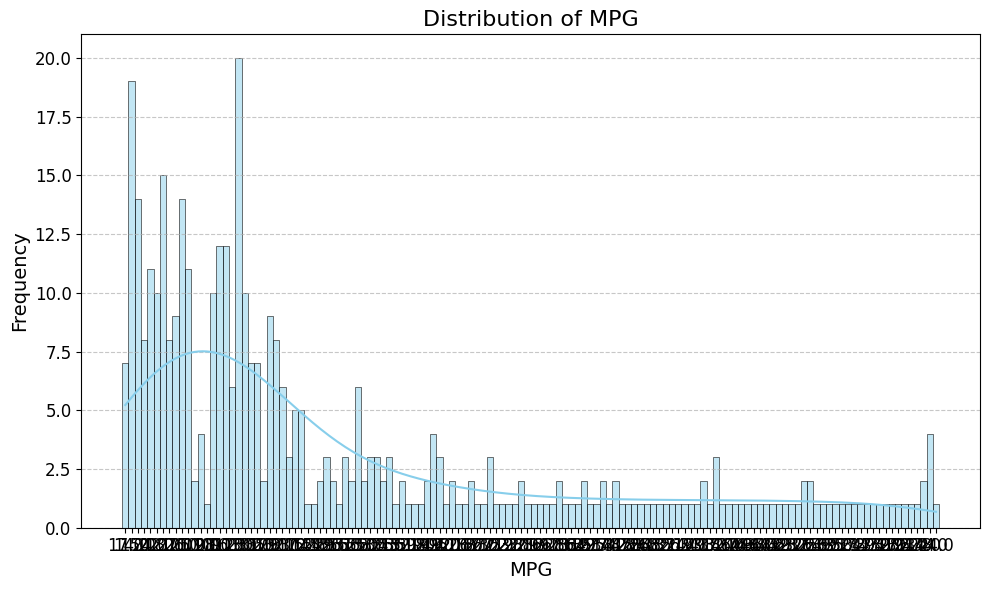

In [551]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
sns.histplot(df_split['MPG'].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of MPG', fontsize=16)
plt.xlabel('MPG', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

Converting all the numerical columns from objects to numbers and grouping based on similar and relevant features

Converting the object values of the dataframe into numerical values

In [566]:
df_split['MPG'] = pd.to_numeric(df_split['MPG'], errors='coerce')
df_split['Cylinders'] = pd.to_numeric(df_split['Cylinders'], errors='coerce')
df_split['Displacement'] = pd.to_numeric(df_split['Displacement'], errors='coerce')
df_split['Weight'] = pd.to_numeric(df_split['Weight'], errors='coerce')

df_split['MPG'] = df_split.groupby(['Cylinders', 'Origin'])['MPG'].transform(
    lambda x: x.fillna(x.median()))

Now let's see what is the mean of the MPG column:

Displaying the mean for each of the features

In [567]:
print("Mean MPG:", df_split['MPG'].mean())
print("Mean Cylinders:", df_split['Cylinders'].mean())
print("Mean Displacement:", df_split['Displacement'].mean())
print("Mean Weight:", df_split['Weight'].mean())

Mean MPG: 23.134164588528677
Mean Cylinders: 5.443890274314215
Mean Displacement: 192.9488778054863
Mean Weight: 2970.660847880299


MPG histogram after fixing it (dividing the MPGs into different batches)

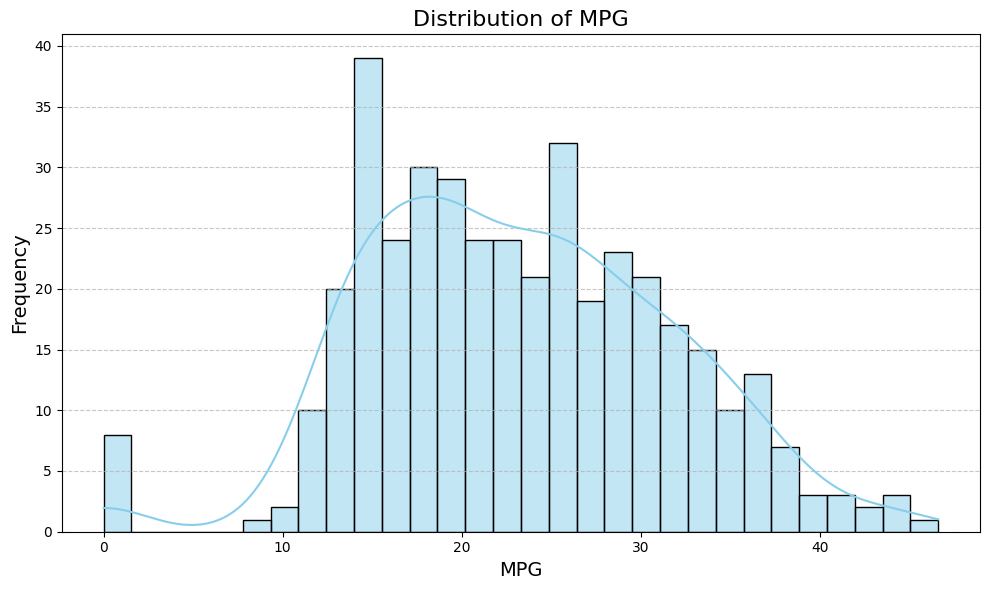

In [553]:
plt.figure(figsize=(10, 6))
sns.histplot(df_split['MPG'].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of MPG', fontsize=16)
plt.xlabel('MPG', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


We can use this mean to compute the missing values since the graph demonstarted a normal distribution

Since we firstly dropped all the rows/records which had missing values, now we have to use a different dataframe. I just created that dataframe before the code cell in which I dropped the rows. It is called "df_split1".

In [554]:
df_split1['MPG'] = pd.to_numeric(df_split1['MPG'], errors='coerce')

print("Before:", df_split1['MPG'].isna().sum(), "missing MPG values")

df_split1['MPG'] = df_split1.groupby(['Cylinders', 'Origin'])['MPG'].transform(
    lambda x: x.fillna(x.mean())
)

print("After:", df_split1['MPG'].isna().sum(), "missing MPG values")


Before: 3 missing MPG values
After: 0 missing MPG values


### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

In [555]:
from sklearn.impute import SimpleImputer

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [556]:
df_split2['MPG'] = pd.to_numeric(df_split2['MPG'], errors='coerce')

print("Before:", df_split2['MPG'].isna().sum(), "missing MPG values")


imputer = SimpleImputer(strategy='mean')
imputer.fit(df_split2[['MPG']])

df_split2['MPG'] = imputer.transform(df_split2[['MPG']])

print("Missing MPG values after imputation:", df_split2['MPG'].isna().sum())


Before: 3 missing MPG values
Missing MPG values after imputation: 0


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

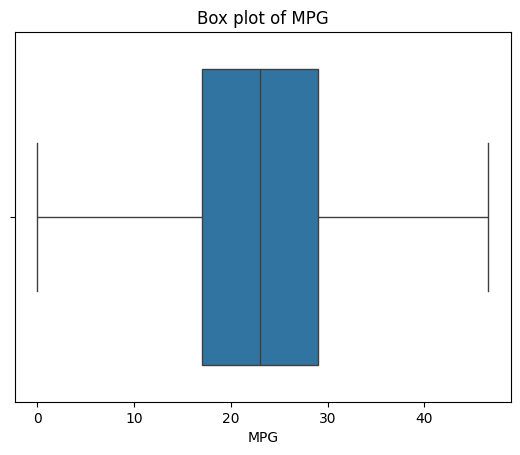

In [557]:
sns.boxplot(x=df_split['MPG'])
plt.title('Box plot of MPG')
plt.show()

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

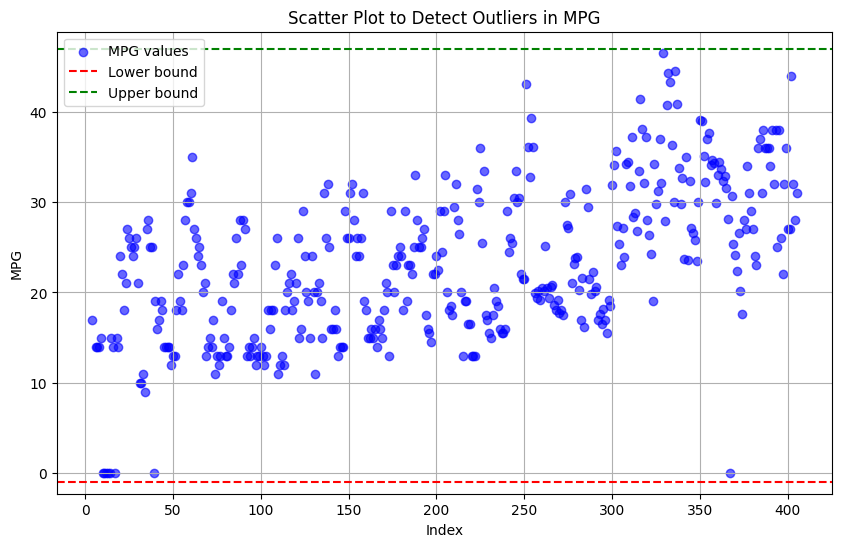

In [558]:
plt.figure(figsize=(10, 6))
plt.scatter(df_split.index, df_split['MPG'], color='blue', alpha=0.6, label='MPG values')


Q1 = df_split['MPG'].quantile(0.25)
Q3 = df_split['MPG'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower bound')
plt.axhline(y=upper_bound, color='green', linestyle='--', label='Upper bound')

plt.xlabel('Index')
plt.ylabel('MPG')
plt.title('Scatter Plot to Detect Outliers in MPG')
plt.legend()
plt.grid(True)
plt.show()


#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [559]:
df_split['MPG'] = pd.to_numeric(df_split['MPG'], errors='coerce')

mpg_mean = df_split['MPG'].mean()
mpg_std  = df_split['MPG'].std()

df_split['MPG_zscore'] = (df_split['MPG'] - mpg_mean) / mpg_std

print(df_split[['MPG', 'MPG_zscore']])

      MPG  MPG_zscore
4    17.0   -0.728559
6    14.0   -1.084872
7    14.0   -1.084872
8    14.0   -1.084872
9    15.0   -0.966101
..    ...         ...
401  27.0    0.459148
402  44.0    2.478251
403  32.0    1.053002
404  28.0    0.577919
405  31.0    0.934231

[401 rows x 2 columns]


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [560]:
z_outliers = df_split[df_split['MPG_zscore'] > 2]

z_outlier_indices = z_outliers.index.tolist()

print("Indices of Z-score outliers:", z_outlier_indices)

Indices of Z-score outliers: [251, 316, 329, 331, 332, 333, 336, 337, 402]


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [561]:
Q1 = df_split['MPG'].quantile(0.25)
Q3 = df_split['MPG'].quantile(0.75)

IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")

Q1: 17.0
Q3: 29.0
IQR (Q3 - Q1): 12.0


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [562]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df_split[(df_split['MPG'] < lower_bound) | (df_split['MPG'] > upper_bound)]

print("Outliers based on IQR:")
print(iqr_outliers)

Outliers based on IQR:
Empty DataFrame
Columns: [Car, MPG, Cylinders, Displacement, Horsepower, Weight, Acceleration, Model, Origin, MPG_zscore]
Index: []


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

## Removing outliers using the Z-Score

Since the Z-Score gave us a list of outlier indexes, unlike the IQR method which did not give us any. The output of the IQR method for detecting the outliers was just an empty list. The Z-Score method gave us a list of 9 indexes of outliers.

In [563]:
print("Shape before removing outliers:", df_split.shape)

df_no_outliers = df_split.drop(index=z_outlier_indices)

df_no_outliers.reset_index(drop=True, inplace=True)

print("Shape after removing outliers:", df_no_outliers.shape)


Shape before removing outliers: (401, 10)
Shape after removing outliers: (392, 10)
